In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

climate_change = pd.read_csv('climate_change.csv', parse_dates=["date"], index_col="date")
austin_weather = pd.read_csv("austin_weather.csv", index_col="DATE")
weather = pd.read_csv("seattle_weather.csv", index_col="DATE")

seattle_weather = weather[weather["STATION"] == "USW00094290"] 
month = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"] 
seattle_weather["MONTH"] = month 
austin_weather["MONTH"] = month

/tmp/ipykernel_1758/782594921.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seattle_weather["MONTH"] = month


In [4]:
climate_change.head()

,co2,relative_temp
date,,
1958-03-06,315.71,0.10
1958-04-06,317.45,0.01
1958-05-06,317.50,0.08
1958-06-06,NaN,-0.05
1958-07-06,315.86,0.06


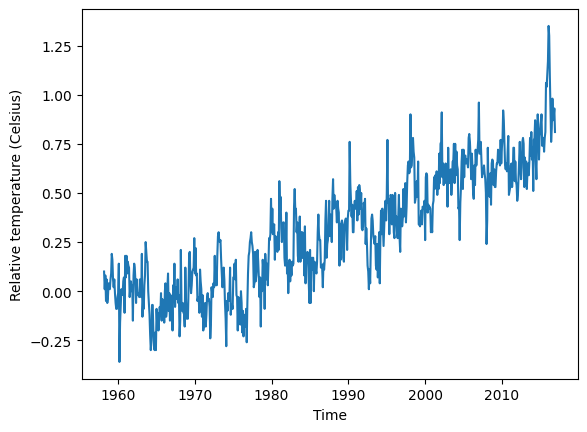

In [21]:
fig, ax = plt.subplots()

ax.plot(climate_change.index, climate_change['relative_temp'])

ax.set_xlabel('Time')

ax.set_ylabel('Relative temperature (Celsius)')

plt.show()

### Zooming in a specific time frame

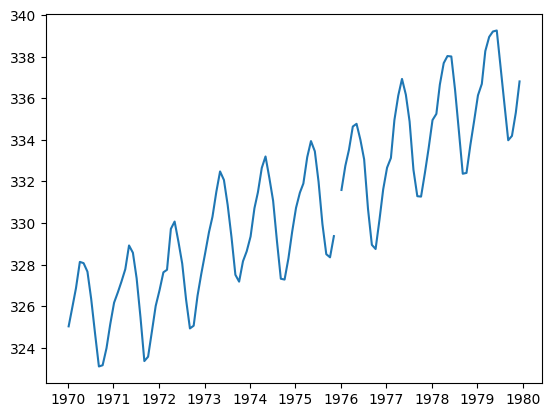

In [22]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

seventies = climate_change["1970-01-01": "1979-12-31"]

ax.plot(seventies.index, seventies["co2"])

plt.show()

In [15]:
# Defining a function to compare co2 and relative temp
def plot_timeseries(axes, x, y, color, xlabel, ylabel):
  axes.plot(x, y, color=color)
  axes.set_xlabel(xlabel)
  axes.set_ylabel(ylabel, color=color)
  axes.tick_params('y', colors=color)

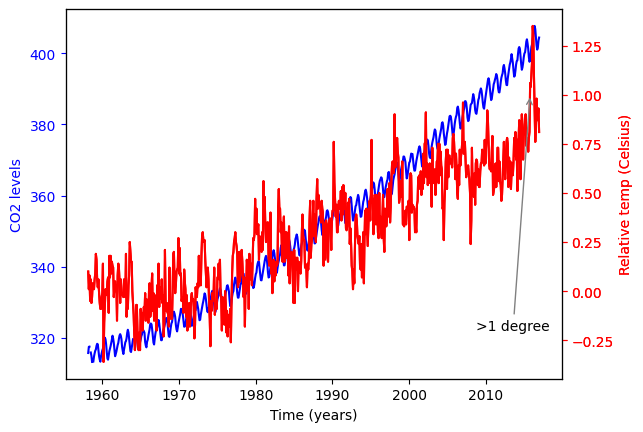

In [19]:
fig, ax = plt.subplots()

# Plotting the CO2 levels time-series in blue
plot_timeseries(ax, climate_change.index, climate_change["co2"], 'blue', "Time (years)", "CO2 levels")

# Creating an Axes object that shares the x-axis
ax2 = ax.twinx()

# Plotting the relative temperature data in red
plot_timeseries(ax2, climate_change.index, climate_change["relative_temp"], 'red', "Time (years)", "Relative temp (Celsius)")
# Create an Axes object that shares the x-axis
ax2 = ax.twinx()

# Plotting the relative temperature data in red
plot_timeseries(ax2, climate_change.index, climate_change["relative_temp"], 'red', "Time (years)", "Relative temp (Celsius)")

# Annotating point with relative temperature >1 degree
ax2.annotate(">1 degree",
             xy=(pd.Timestamp('2015-10-06'), 1), 
             xytext=(pd.Timestamp('2008-10-06'), -0.2), 
             arrowprops={"arrowstyle":"->", "color":"gray"})

plt.show()

### Adding error bars

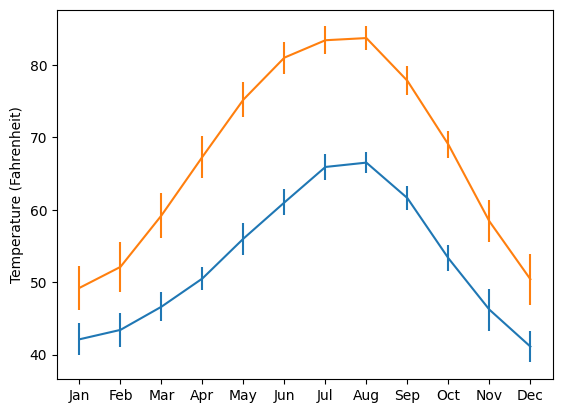

In [6]:
fig, ax = plt.subplots()

# Adding Seattle temperature data in each month with error bars
ax.errorbar(seattle_weather["MONTH"], seattle_weather["MLY-TAVG-NORMAL"], yerr=seattle_weather["MLY-TAVG-STDDEV"])

# Adding Austin temperature data in each month with error bars
ax.errorbar(austin_weather["MONTH"], austin_weather["MLY-TAVG-NORMAL"], yerr=austin_weather["MLY-TAVG-STDDEV"]) 

# Setting the y-axis label
ax.set_ylabel("Temperature (Fahrenheit)")

plt.show()

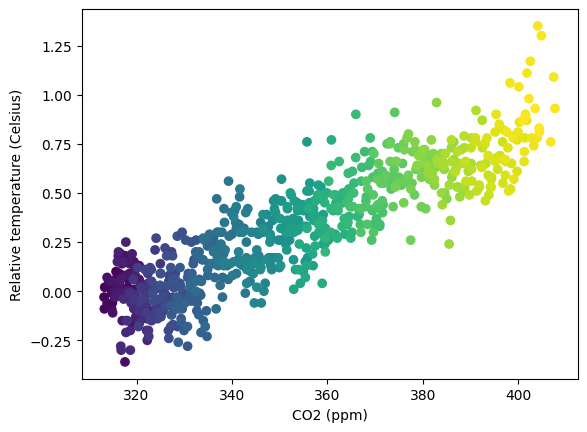

In [7]:
fig, ax = plt.subplots()
ax.scatter(climate_change["co2"], climate_change["relative_temp"],
c=climate_change.index)
ax.set_xlabel("CO2 (ppm)")
ax.set_ylabel("Relative temperature (Celsius)")
plt.show()